In [11]:
!nvidia-smi


Tue Oct 15 19:18:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:01:00.0 Off |                    0 |
|  0%   67C    P0            242W /  300W |   12544MiB /  46068MiB |     68%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import necessary libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from transformers import (
    LEDForConditionalGeneration,
    LEDTokenizer,
    Seq2SeqTrainingArguments,
    Trainer
)

/home/mostah/anaconda3/envs/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the dataset
dataset = load_dataset("ahmed275/OpinionOfTheCourt_dataset_new")
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(dataset['train'])

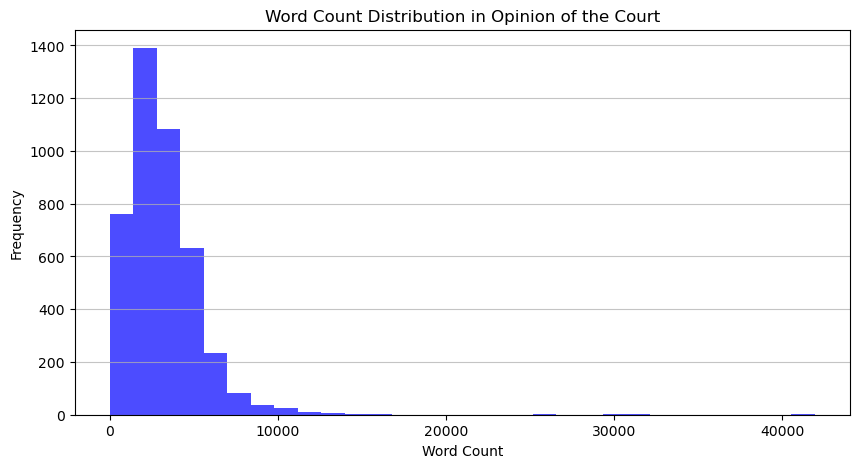

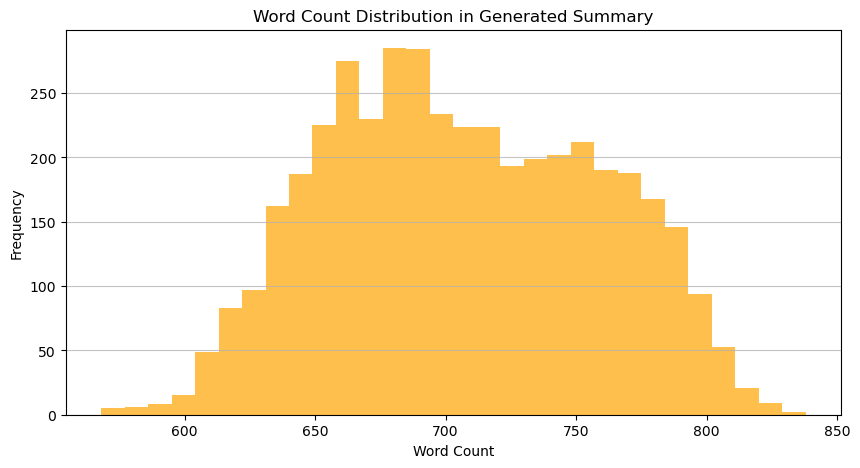

In [12]:


# Calculate the word count for each entry in the specified columns
df['opinion_word_count'] = df['opinionOfTheCourt'].apply(lambda x: len(str(x).split()))
df['summary_word_count'] = df['generated_summary'].apply(lambda x: len(str(x).split()))

# Plot the histogram for 'opinionOfTheCourt'
plt.figure(figsize=(10, 5))
plt.hist(df['opinion_word_count'], bins=30, color='blue', alpha=0.7)
plt.title('Word Count Distribution in Opinion of the Court')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot the histogram for 'generated_summary'
plt.figure(figsize=(10, 5))
plt.hist(df['summary_word_count'], bins=30, color='orange', alpha=0.7)
plt.title('Word Count Distribution in Generated Summary')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
# Initialize the tokenizer
tokenizer = LEDTokenizer.from_pretrained("allenai/led-base-16384")

# Function to count tokens in a text
def count_tokens(text):
    tokens = tokenizer.tokenize(text)
    return len(tokens)

# Apply the function to count tokens in each column
df['opinion_tokens'] = df['opinionOfTheCourt'].apply(count_tokens)
df['syllabus_tokens'] = df['syllabus'].apply(count_tokens)


KeyboardInterrupt: 

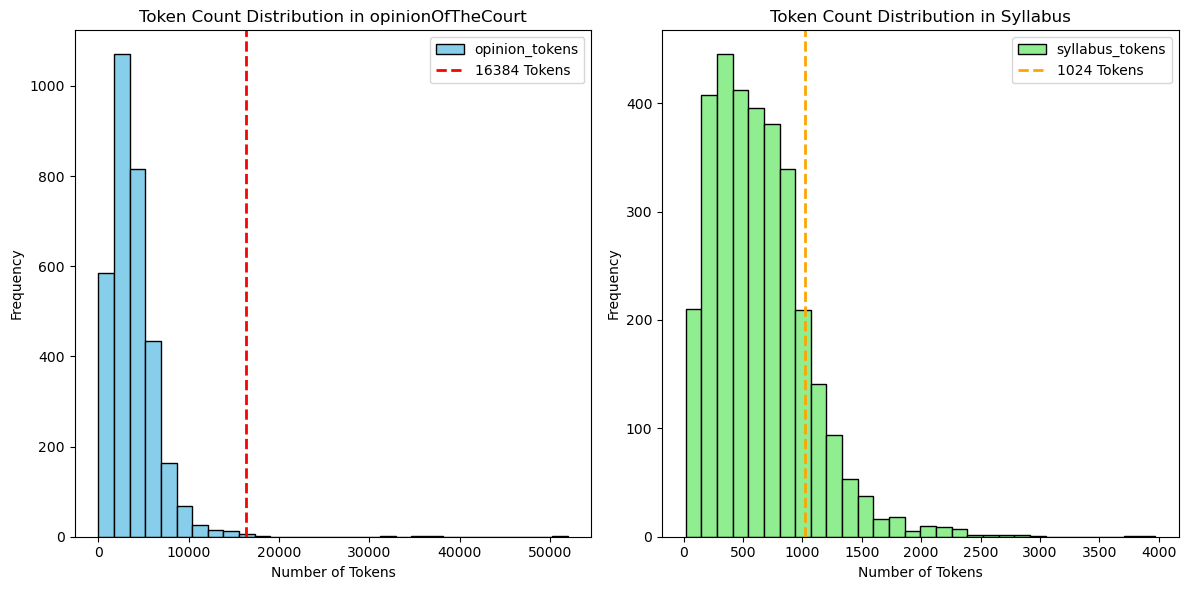

In [7]:
# Plot the distribution of token counts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['opinion_tokens'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Token Count Distribution in opinionOfTheCourt')

# Add vertical lines for 16384 tokens
plt.axvline(x=16384, color='red', linestyle='dashed', linewidth=2, label='16384 Tokens')

plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.legend()

plt.subplot(1, 2, 2)
df['syllabus_tokens'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
plt.title('Token Count Distribution in Syllabus')

# Add vertical line for 1024 tokens
plt.axvline(x=1024, color='orange', linestyle='dashed', linewidth=2, label='1024 Tokens')

plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Assuming df is your DataFrame and it already has 'opinion_tokens' and 'syllabus_tokens' columns

# Count the number of entries with token counts <= 16384 for opinionOfTheCourt
opinion_count_le = len(df[df['opinion_tokens'] <= 16384])
opinion_count_gt = len(df[df['opinion_tokens'] > 16384])

# Count the number of entries with token counts <= 1024 for syllabus
syllabus_count_le = len(df[df['syllabus_tokens'] <= 1024])
syllabus_count_gt = len(df[df['syllabus_tokens'] > 1024])

# Print the results
print(f"Total number of opinionOfTheCourt entries: {len(df['opinion_tokens'])}")
print(f"Number of opinionOfTheCourt entries with tokens <= 16384: {opinion_count_le}")
print(f"Number of opinionOfTheCourt entries with tokens > 16384: {opinion_count_gt}")

print(f"\nTotal number of syllabus entries: {len(df['syllabus_tokens'])}")
print(f"Number of syllabus entries with tokens <= 1024: {syllabus_count_le}")
print(f"Number of syllabus entries with tokens > 1024: {syllabus_count_gt}")


In [5]:
import pandas as pd

# Assuming df is your original DataFrame and it has a 'year' column as a string

# Create a temporary copy of the 'year' column as integers
year_series = df['year'].astype(int)

# Count the number of cases in each specified year range
count_1955_2002 = len(year_series[(year_series >= 1955) & (year_series <= 2002)])
count_2003_2010 = len(year_series[(year_series >= 2003) & (year_series <= 2010)])
count_2011_2019 = len(year_series[(year_series >= 2011) & (year_series <= 2024)])

# Print the results
print(f"Number of cases from 1955 to 2002: {count_1955_2002}")
print(f"Number of cases from 2003 to 2010: {count_2003_2010}")
print(f"Number of cases from 2011 to 2019: {count_2011_2019}")


Number of cases from 1955 to 2002: 4270
Number of cases from 2003 to 2010: 541
Number of cases from 2011 to 2019: 547


In [16]:
import pandas as pd

# Assuming df is your DataFrame and it has a 'year' column as a string

# Convert the 'year' column to integer
df['year'] = df['year'].astype(int)

# Define the bins for 10-year ranges
bins = [1955, 1965, 1975, 1985, 1995, 2005]
labels = ['1955-1964', '1965-1974', '1975-1984', '1985-1994', '1995-2004']

# Categorize the years into bins
df['year_range'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Group by the year range and count the occurrences
year_range_counts = df['year_range'].value_counts().sort_index()

# Print the results
print(year_range_counts)


year_range
1955-1964    1031
1965-1974    1175
1975-1984    1294
1985-1994     767
1995-2004       3
Name: count, dtype: int64


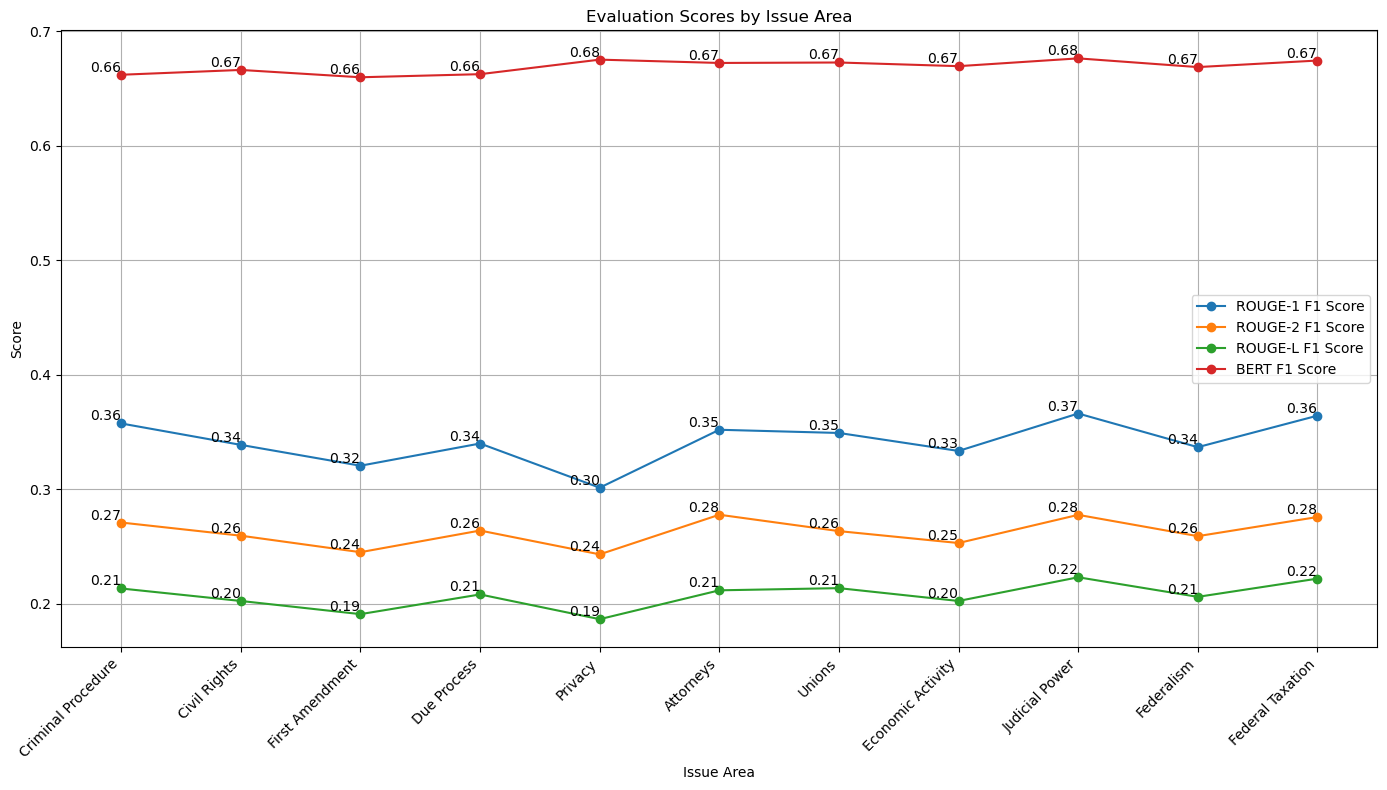

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the mapping of issue areas to labels
issue_area_labels = {
    1.0: "Criminal Procedure",
    2.0: "Civil Rights",
    3.0: "First Amendment",
    4.0: "Due Process",
    5.0: "Privacy",
    6.0: "Attorneys",
    7.0: "Unions",
    8.0: "Economic Activity",
    9.0: "Judicial Power",
    10.0: "Federalism",
    11.0: "Interstate Relations",
    12.0: "Federal Taxation"
}

# Prepare the data
data = {
    'Issue Area': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0],
    'ROUGE-1': [0.3573, 0.3386, 0.3204, 0.3398, 0.3012, 0.3518, 0.3490, 0.3333, 0.3660, 0.3366, 0.3641],
    'ROUGE-2': [0.2708, 0.2593, 0.2449, 0.2638, 0.2430, 0.2776, 0.2633, 0.2529, 0.2775, 0.2589, 0.2756],
    'ROUGE-L': [0.2132, 0.2023, 0.1908, 0.2080, 0.1864, 0.2116, 0.2135, 0.2023, 0.2230, 0.2059, 0.2218],
    'BERT F1': [0.6618, 0.6660, 0.6596, 0.6623, 0.6750, 0.6721, 0.6725, 0.6693, 0.6761, 0.6685, 0.6742]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map the issue area numbers to labels
df['Issue Area'] = df['Issue Area'].map(issue_area_labels)

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(df['Issue Area'], df['ROUGE-1'], marker='o', label='ROUGE-1 F1 Score')
plt.plot(df['Issue Area'], df['ROUGE-2'], marker='o', label='ROUGE-2 F1 Score')
plt.plot(df['Issue Area'], df['ROUGE-L'], marker='o', label='ROUGE-L F1 Score')
plt.plot(df['Issue Area'], df['BERT F1'], marker='o', label='BERT F1 Score')

# Annotate each point with its value
for i, row in df.iterrows():
    plt.text(i, row['ROUGE-1'], f"{row['ROUGE-1']:.2f}", ha='right', va='bottom')
    plt.text(i, row['ROUGE-2'], f"{row['ROUGE-2']:.2f}", ha='right', va='bottom')
    plt.text(i, row['ROUGE-L'], f"{row['ROUGE-L']:.2f}", ha='right', va='bottom')
    plt.text(i, row['BERT F1'], f"{row['BERT F1']:.2f}", ha='right', va='bottom')

# Add labels and title
plt.xlabel('Issue Area')
plt.ylabel('Score')
plt.title('Evaluation Scores by Issue Area')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
